In [7]:
import os
import glob


def load_file(fil):
    with open(fil, "r") as filw:
        txt = " ".join(filw.readlines())
        return txt

dirn = "aclImdb"

subdirs_1 = ["test", "train"]

subdirs_2 = ["pos", "neg"]

filenames = {}

for route in subdirs_1:
    p = os.path.join(dirn, route)
    filenames[route] = {}
    for sent in subdirs_2:
        filenames[route][sent] = glob.glob(os.path.join(p, sent, "*.txt"))
        print(os.path.join(p, sent, "*.txt"))
        filenames[route][sent] = [load_file(fil) for fil in filenames[route][sent]]
            
print("Done.")
print(filenames["test"]["pos"][0])

aclImdb/test/pos/*.txt
aclImdb/test/neg/*.txt
aclImdb/train/pos/*.txt
aclImdb/train/neg/*.txt
Done.
I cannot understand the need to jump backwards and forwards to scene set, and pad out the plot. Showing that someone has a skill right before they use it, I believe, is offending our intelligence. It's starting to feel a little contrived, and as though they are making up for being so vague for the first three series. A little disappointing this episode.<br /><br />Furthermore, using past quirks, like Locke's ability to know when a storm is ending, is frankly insulting... are we supposed to ooh and arr, or laugh at the softer side of Locke?<br /><br />This episode was all over the place.


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow
import numpy as np
from scipy.spatial.distance import cdist
    


# from tf.keras.models import Sequential  # This does not work!
import tensorflow.contrib.keras as keras
# from tensorflow.contrib.keras.models import Sequential
# from tensorflow.contrib.keras.layers import Dense, GRU, Embedding
# from tensorflow.contrib.keras.optimizers import Adam
# from tensorflow.contrib.keras.preprocessing.text import Tokenizer
# from tensorflow.contrib.keras.preprocessing.sequence import pad_sequences

In [9]:
def create_labels(data):
    data_flat = []
    labels = []
    for k, v in data.items():
        if k == "pos":
            data_flat.extend(v)
            labels.extend([1 for _ in range(len(v))])
        if k == "neg":
            data_flat.extend(v)
            labels.extend([0 for _ in range(len(v))])
    return data_flat, labels

# creating test and train db

X_train, y_train = create_labels(filenames["train"])
X_test, y_test = create_labels(filenames["test"])

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

print((X_train)[0], (y_train)[0])
print((X_test)[0], (y_test)[0])



25000 25000
25000 25000
Well, I just discovered that there is a show more disgusting and shocking than "Little Britain" and I like it! "The League of Gentlemen" is a sick British comedy that is about the most awful, insane and disgusting small town in all the UK. This place makes Dibley and Craggy Island (from "The Vicar of Dibley" and "Father Ted") seem pretty normal!! The format of the show is a lot like LITTLE Britain except that all of it centers around the townspeople of this one hellish town. Both shows feature the same skits again and again every episode and some obviously inspired "Little Britain" (particularly the job seeking class skit). But the show differs because although it is crude like "Little Britain" (hence not a show for kids), the show has a sick and sadistic quality that sets it apart from all these shows. In particular, animal cruelty and serial killing are recurring themes throughout the show.<br /><br />Now if you haven't guessed, this is NOT a show for kids, th

In [10]:
print(filenames["test"]["pos"][0], "\n\n")
print(filenames["test"]["neg"][0], "\n\n")
print(filenames["train"]["pos"][0], "\n\n")
print(filenames["train"]["neg"][0], "\n\n")

I cannot understand the need to jump backwards and forwards to scene set, and pad out the plot. Showing that someone has a skill right before they use it, I believe, is offending our intelligence. It's starting to feel a little contrived, and as though they are making up for being so vague for the first three series. A little disappointing this episode.<br /><br />Furthermore, using past quirks, like Locke's ability to know when a storm is ending, is frankly insulting... are we supposed to ooh and arr, or laugh at the softer side of Locke?<br /><br />This episode was all over the place. 


This movie is so bad that it actually gets funny. One of the worst movies I've ever seen in my entire life. The funny thing was that the trailer had scenes in it that wasn't in the movie. Just by watching the trailer I would have saved a lot of my time. It actually showed everything that happened in the movie except for the conclusion and that was also so obvious.<br /><br />It's honestly hard to thi

(array([ 12500.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  12500.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

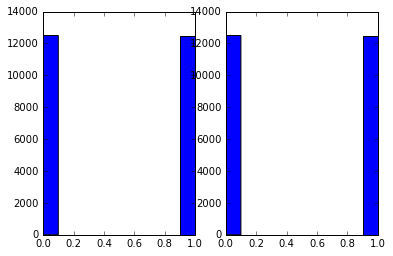

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax2.hist(y_train)
ax1.hist(y_test)

In [12]:
# Tokenize

num_words = 10000
tokenizer = keras.preprocessing.text.Tokenizer(nb_words=num_words)

data_text = X_train + X_test

In [13]:
%%time
tokenizer.fit_on_texts(data_text)


CPU times: user 7.36 s, sys: 0 ns, total: 7.36 s
Wall time: 7.36 s


In [14]:
i = 10
for k, v in tokenizer.word_index.items():
    
    i -= 1
    if i > 0:
        print(k, v)
print (abs(i) + 10)

        


oberoi 52583
michal 48382
cit's 67940
belknap 53400
stubs 96717
allegra 17507
erice's 113061
swaying 22258
'smart 42719
124252


In [16]:
x_train_tokens = tokenizer.texts_to_sequences(X_train)
x_test_tokens = tokenizer.texts_to_sequences(X_test)



num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)
print(np.mean(num_tokens))
print(np.max(num_tokens))
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens


pad = 'pre'

x_train_pad = keras.preprocessing.sequence.pad_sequences(x_train_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)


x_test_pad = keras.preprocessing.sequence.pad_sequences(x_test_tokens, maxlen=max_tokens,
                           padding=pad, truncating=pad)


221.27716
2208


In [17]:
print(x_train_pad.shape)
print(x_test_pad.shape)

(25000, 544)
(25000, 544)


In [19]:
# model

embedding_size = 8
model = keras.models.Sequential()


print(num_words, embedding_size, max_tokens)
model.add(keras.layers.Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='layer_embedding'))



model.add(keras.layers.GRU(units=16, return_sequences=True))

model.add(keras.layers.GRU(units=8, return_sequences=True))
model.add(keras.layers.GRU(units=4))

model.add(keras.layers.Dense(1, activation='sigmoid'))



optimizer = keras.optimizers.Adam(lr=1e-3)


model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])



model.summary()



10000 8 544
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 544, 8)            80000     
_________________________________________________________________
gru_1 (GRU)                  (None, 544, 16)           1200      
_________________________________________________________________
gru_2 (GRU)                  (None, 544, 8)            600       
_________________________________________________________________
gru_3 (GRU)                  (None, 4)                 156       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 81,961
Trainable params: 81,961
Non-trainable params: 0
_________________________________________________________________


In [20]:
batch_size = 64
epochs = 3

model.fit(x_train_pad, y_train, validation_split=0.05, batch_size=batch_size, epochs=epochs)

Train on 23750 samples, validate on 1250 samples
Epoch 1/3
23750/23750 [==============================] - 426s 18ms/step - loss: 0.6619 - acc: 0.5739 - val_loss: 0.5992 - val_acc: 0.6856
Epoch 2/3
23750/23750 [==============================] - 405s 17ms/step - loss: 0.4371 - acc: 0.8016 - val_loss: 0.3016 - val_acc: 0.8776
Epoch 3/3
23750/23750 [==============================] - 412s 17ms/step - loss: 0.3061 - acc: 0.8786 - val_loss: 0.3219 - val_acc: 0.8664


In [21]:
model.evaluate(x_test_pad, y_test)

25000/25000 [==============================] - 203s 8ms/step


[0.33020338443756103, 0.86095999999999995]

In [22]:
y_pred = model.predict(x_test_pad[:1000])
print(y_pred.shape)




(1000, 1)


In [23]:
y_pred = y_pred.T[0]
y_pred = np.array([1.0 if p>0.5 else 0.0 for p in y_pred])
y_true = np.array(y_test[:1000])

incorrect = np.where(y_pred != y_true)

print(len(incorrect))

print(incorrect[0])

1
[  0   6  17  30  31  42  47  55  68  82  86  88 100 104 122 123 126 133
 157 159 161 165 170 178 196 197 199 201 203 209 211 218 225 229 239 252
 255 256 259 267 276 290 310 313 321 334 353 354 360 368 370 382 387 401
 410 419 425 426 427 433 434 438 444 445 451 455 462 485 501 510 512 519
 521 526 531 535 538 539 540 551 552 554 561 573 577 581 585 591 599 605
 619 628 633 640 647 649 652 657 664 678 681 682 685 689 692 695 702 703
 708 711 714 723 739 741 752 760 763 767 772 774 777 785 802 811 828 829
 833 845 846 847 853 858 867 876 877 879 893 898 899 917 919 926 927 930
 931 932 944 952 970 974 980 985 995 999]


In [30]:
len(incorrect[0])
incorrect[0][0]

0

In [31]:
x_test_pad[incorrect[0][0]]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [38]:
# def token_to_text(tokens):
rev_index = {v: k for k, v in tokenizer.word_index.items()}  

In [43]:
def token_to_text(tokens):
    txt = []
    for tok in tokens:
#         print(tok)
        txt.append(rev_index[tok] if tok in rev_index else None)
    return " ".join(list(filter(lambda x: x, txt)))
# print(rev_index)
cur = incorrect[0][1]
print(token_to_text(x_test_pad[cur]))
print(y_pred[cur])
print(y_true[cur])

beautiful this movie the bad it's genre of films br br the only two talents in it are richard boone and joan van ark and only boone is any good it's kind of sad that the man who rose to fame as should wind up in this ugly pile of celluloid while he turns in a fantastic performance i couldn't help but feel that he so all his fellow actors in this piece that he shouldn't even have been there br br the effects in this film are laughable but fun the idea of a dinosaur being buried in the wall of a cave and suddenly coming to life is b movie gold when the gets killed watch how it falls it's clear that the stunt performer in the front of the costume knows the timing best he falls to the ground well before the back half of the dinosaur follows suit br br speaking of there is nothing good to say about the purple in this flick it seems to have some kind of technology since to be the best in the world twice fails to notice it until it's within biting range of him i don't know how all the prints 